In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import pi, sqrt, asin

# (h)

### In order to measure in the basis of $\{|+\rangle, |-\rangle\}$, first, we make the eigenstates in this basis, $|+\rangle$ and $|-\rangle\$.

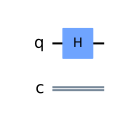

In [2]:
plus = QuantumCircuit(1, 1)
minus = QuantumCircuit(1, 1)

plus.h(0)
minus.x(0)
minus.h(0)

plus.draw()

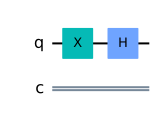

In [3]:
minus.draw()

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


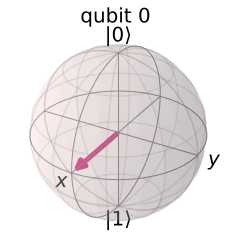

In [4]:
simulator = Aer.get_backend('statevector_simulator')

job = execute(plus, simulator)
result = job.result()
plus_statevector = result.get_statevector()

job = execute(minus, simulator)
result = job.result()
minus_statevector = result.get_statevector()

plot_bloch_multivector(plus_statevector)

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


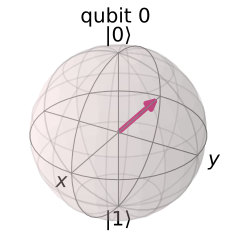

In [5]:
plot_bloch_multivector(minus_statevector)

### In the basis of $\{|+\rangle, |-\rangle\}$, $|+\rangle$ should have $1$ as the probability of getting $|+\rangle$, and $|-\rangle$ should have $1$ as the probability of getting $|-\rangle$. So let's try apply a `H` gate to the qubits before measuring.

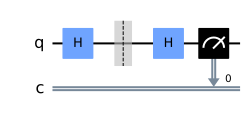

In [6]:
plus.barrier()
plus.h(0)
plus.measure(0, 0)

plus.draw()

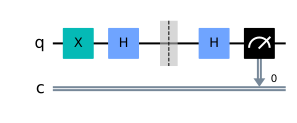

In [7]:
minus.barrier()
minus.h(0)
minus.measure(0, 0)

minus.draw()

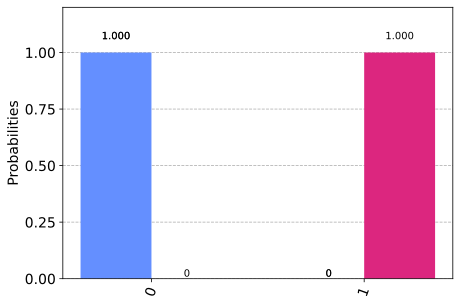

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(plus, simulator, shots = 1000000)
result = job.result()
plus_counts = result.get_counts()
job = execute(minus, simulator, shots = 1000000)
result = job.result()
minus_counts = result.get_counts()

plot_histogram([plus_counts, minus_counts])

### Now, we know that since $H|0\rangle = |+\rangle$,  it is shown that through this measure, the probability of getting $|+\rangle$ is under the label of 0 and the probability of getting $|-\rangle$ is under the label of 1.

### Let's try to find the angle that can leads us to the qubit which has 2/3 probability of $|-\rangle$, using the `H` gate and the `R_Z` gate.

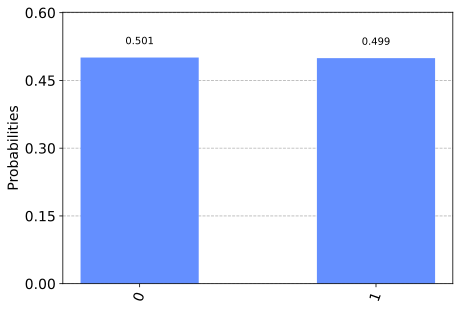

In [9]:
the_angle = pi/2

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(the_angle, 0)

circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)

job = execute(circuit, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

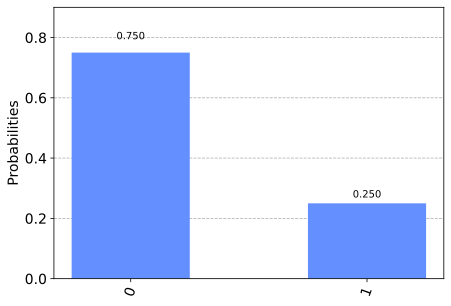

In [10]:
the_angle = pi/3

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(the_angle, 0)

circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)

job = execute(circuit, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### There seems to be a connection between `the_angle` and the outcome.

| `the_angle` |   0   |   1   | sin(`the_angle`/2) | sin^2(`the_angle`/2)
| :---------: | :---: | :---: | :----------------: | :----------------: |
|   $\pi/2$   |  1/2  |  1/2  |     $1/\sqrt2$     |         1/2        |
|   $\pi/3$   |  3/4  |  1/4  |         1/2        |         1/4        |

### Let's guess that the probability of getting $|-\rangle$, under the label 1, is $sin^2($ `the_angle` $/2)$. Thus,

$
\sin^2(x/2) = 2/3 \\
\sin(x/2) = \sqrt(2/3) \\
x/2 = \arcsin(\sqrt(2/3)) \\
x = 2 * \arcsin(\sqrt(2/3))_\#
$

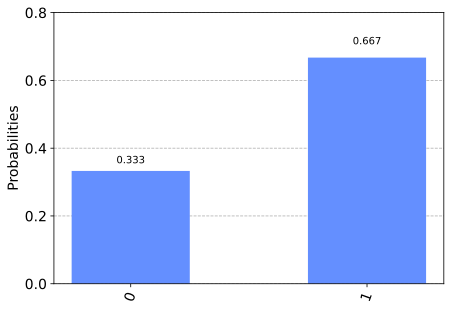

In [11]:
the_angle = 2 * asin(sqrt(2/3))

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(the_angle, 0)

circuit.barrier()
circuit.h(0)
circuit.measure(0, 0)

job = execute(circuit, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


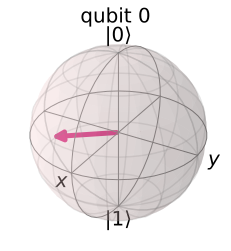

In [12]:
the_angle = 2 * asin(sqrt(2/3))

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(the_angle, 0)

circuit.barrier()
circuit.h(0)

simulator = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

plot_bloch_multivector(statevector)

### And that's one way to prepare it. Though, there are infinite many states that has the same outcome. Here's one.

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


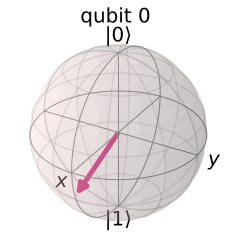

In [13]:
the_angle = 2 * asin(sqrt(2/3))

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(the_angle, 0)
circuit.rx(pi/2, 0)

circuit.barrier()
circuit.h(0)

simulator = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

plot_bloch_multivector(statevector)

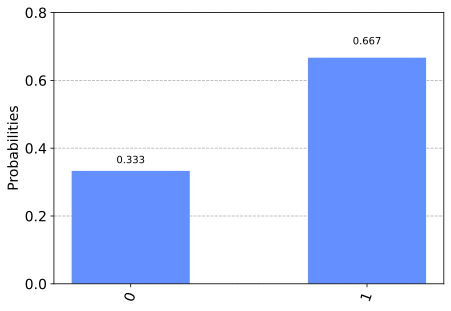

In [14]:
circuit.measure(0, 0)

job = execute(circuit, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### Here's one more.

/usr/local/anaconda3/envs/IBMQ/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


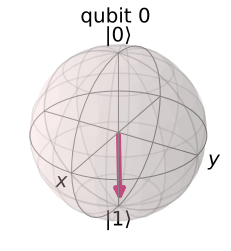

In [15]:
the_angle = 2 * asin(sqrt(2/3))

circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(the_angle, 0)
circuit.rx(pi/180*120.95726, 0)

circuit.barrier()
circuit.h(0)

simulator = Aer.get_backend('statevector_simulator')

job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()

plot_bloch_multivector(statevector)

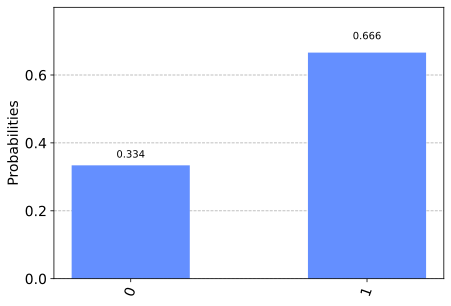

In [16]:
circuit.measure(0, 0)

job = execute(circuit, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### Since the `R_X` gate rotates the qubit around the $+ x$-axis, which changes only the relative phase in the basis of $\{|+\rangle, |-\rangle\}$, therefore no matter what angle it rotates, it doesn't change the probability of getting either $|+\rangle$ or $|-\rangle$. And thus exist infinite many states who have the same outcome.